In [64]:
%matplotlib inline
import os
import pandas as pd
from pandas.util.testing import assert_frame_equal
import numpy as np
import itertools 
import matplotlib.pyplot as plt
from mhcflurry import predict

In [3]:
filepath = "./data/immunogenic_peptides.txt"
if os.path.isfile(filepath):
    df = pd.read_csv(filepath, sep="\t")
    print("Reading {}".format(os.path.basename(filepath)))
else:
    print("File path is wrong")

Reading immunogenic_peptides.txt


In [8]:
df.head(2)

,Peptide,MHC,Species,Immunogenicity
0,AAFDRKSDAK,HLA-A1101,Homo,immunogenic
1,AAFEFINSL,H-2-Kb,Mus,immunogenic


In [14]:
human_df = df[df["MHC"].str.contains("HLA-*")]
mouse_df = df[df["MHC"].str.contains("H-2*")]
df[df["Species"]=="Homo"].shape, human_df.shape
# Why are they different?

((1114, 4), (1891, 4))

In [18]:
human_df.index = range(1,len(human_df) + 1)
human_df.head(2)

,Peptide,MHC,Species,Immunogenicity
1,AAFDRKSDAK,HLA-A1101,Homo,immunogenic
2,AAHARFVAA,HLA-B0801,Homo,immunogenic


In [19]:
predictions = pd.DataFrame()
warning = pd.DataFrame()
warnings = 0
warning_loc = []
for i in range(len(df)):
    try:
        prediction = predict(alleles=human_df["MHC"].iloc[i:i+1].reset_index(drop=True),
                                   peptides=human_df["Peptide"].iloc[0:1].reset_index(drop=True))
        frame = [predictions, prediction]
        predictions = pd.concat(frame)
    except ValueError:
        warnings += 1
        frame = [warning, df.iloc[i]]
        warning = pd.concat(frame)
        warning_loc.append(i)
if len(predictions):
    print("Predictions made")
else:
    print("Something went wrong")
print("Number of warnings is {}".format(warnings))
print(warning)

Predictions made
Number of warnings is 1
                              0
Peptide               LIYKGTYEL
MHC                   HLA-A0201
Species                     Mus
Immunogenicity  non-immunogenic


In [20]:
"""
'HLA-B1502' allele causes an error in mhcflurry
"""
HLA_alleles = np.unique(human_df["MHC"])
idxs = np.where(HLA_alleles == 'HLA-B1502')
HLA_alleles = np.delete(HLA_alleles, idxs)
HLA_alleles

array(['HLA-A0101', 'HLA-A0201', 'HLA-A0202', 'HLA-A0203', 'HLA-A0206',
       'HLA-A0211', 'HLA-A0301', 'HLA-A1101', 'HLA-A2301', 'HLA-A2402',
       'HLA-A2601', 'HLA-A2902', 'HLA-A3001', 'HLA-A3002', 'HLA-A3101',
       'HLA-A6801', 'HLA-A6802', 'HLA-A6901', 'HLA-B0702', 'HLA-B0801',
       'HLA-B1801', 'HLA-B2705', 'HLA-B3501', 'HLA-B3901', 'HLA-B4001',
       'HLA-B4002', 'HLA-B4402', 'HLA-B4403', 'HLA-B4501', 'HLA-B5101',
       'HLA-B5301', 'HLA-B5701', 'HLA-B5801'], dtype=object)

In [140]:
ids = []
for peptide in human_df["Peptide"]:
    peptide1 = peptide
    peptide = list(peptide)
    while len(peptide) != 1:
        letter = iter(peptide)
        peptide = map(''.join, itertools.izip(letter, letter))
    predictions = predict(alleles=HLA_alleles, peptides=peptide).sort("Prediction", ascending=False)
    allele = human_df[human_df["Peptide"]==peptide1]["MHC"].values[0]
    position = np.where(predictions["Allele"]==allele)
    #position = str(position[0]).strip("['']")
    position = position[0]
    ids.append(position)
if ids:
    print("Everything is fine")
else:
    print("Something went wrong")

/home/vasily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Everything is fine


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50c9905850>]], dtype=object)

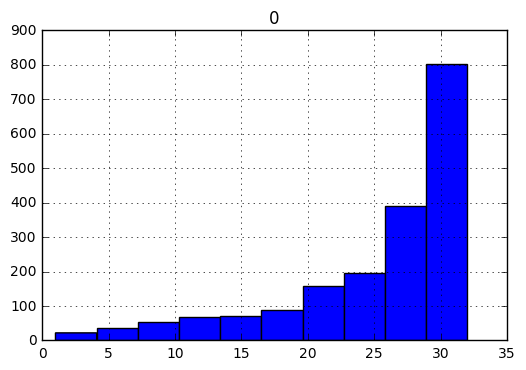

In [150]:
# Alleles indexes in predicted allele ranks
inds = pd.DataFrame(ids)
inds.hist()

In [ ]:
len(in)